![](car.jpg)

In [2]:
import pandas as pd
import numpy as np
import matplotlib as pyplot
import seaborn as sns
%matplotlib inline

In [3]:
# Read the CSV file into a DataFrame with the specified encoding
df = pd.read_csv('car_purchasing.csv', encoding='ISO-8859-1')

In [4]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [5]:
df.shape

(500, 9)

In [6]:
df.head(100)

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
95,Ariana Nash,vel.turpis.Aliquam@consequatpurus.edu,Central African Republic,1,46.696118,56009.73073,11030.265400,391848.6041,40004.87142
96,Glenna Graham,sodales@maurisSuspendisse.com,Bolivia,0,46.245735,90556.62686,13872.566700,479586.9387,61593.52058
97,Holmes Lane,ac.orci@accumsaninterdum.co.uk,Laos,1,43.389985,71716.45662,8870.714301,165866.2000,39503.38829
98,Emerald Hamilton,sit.amet.orci@facilisis.edu,Egypt,0,48.921401,68502.10943,5831.118245,515084.1891,52474.71839


In [7]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


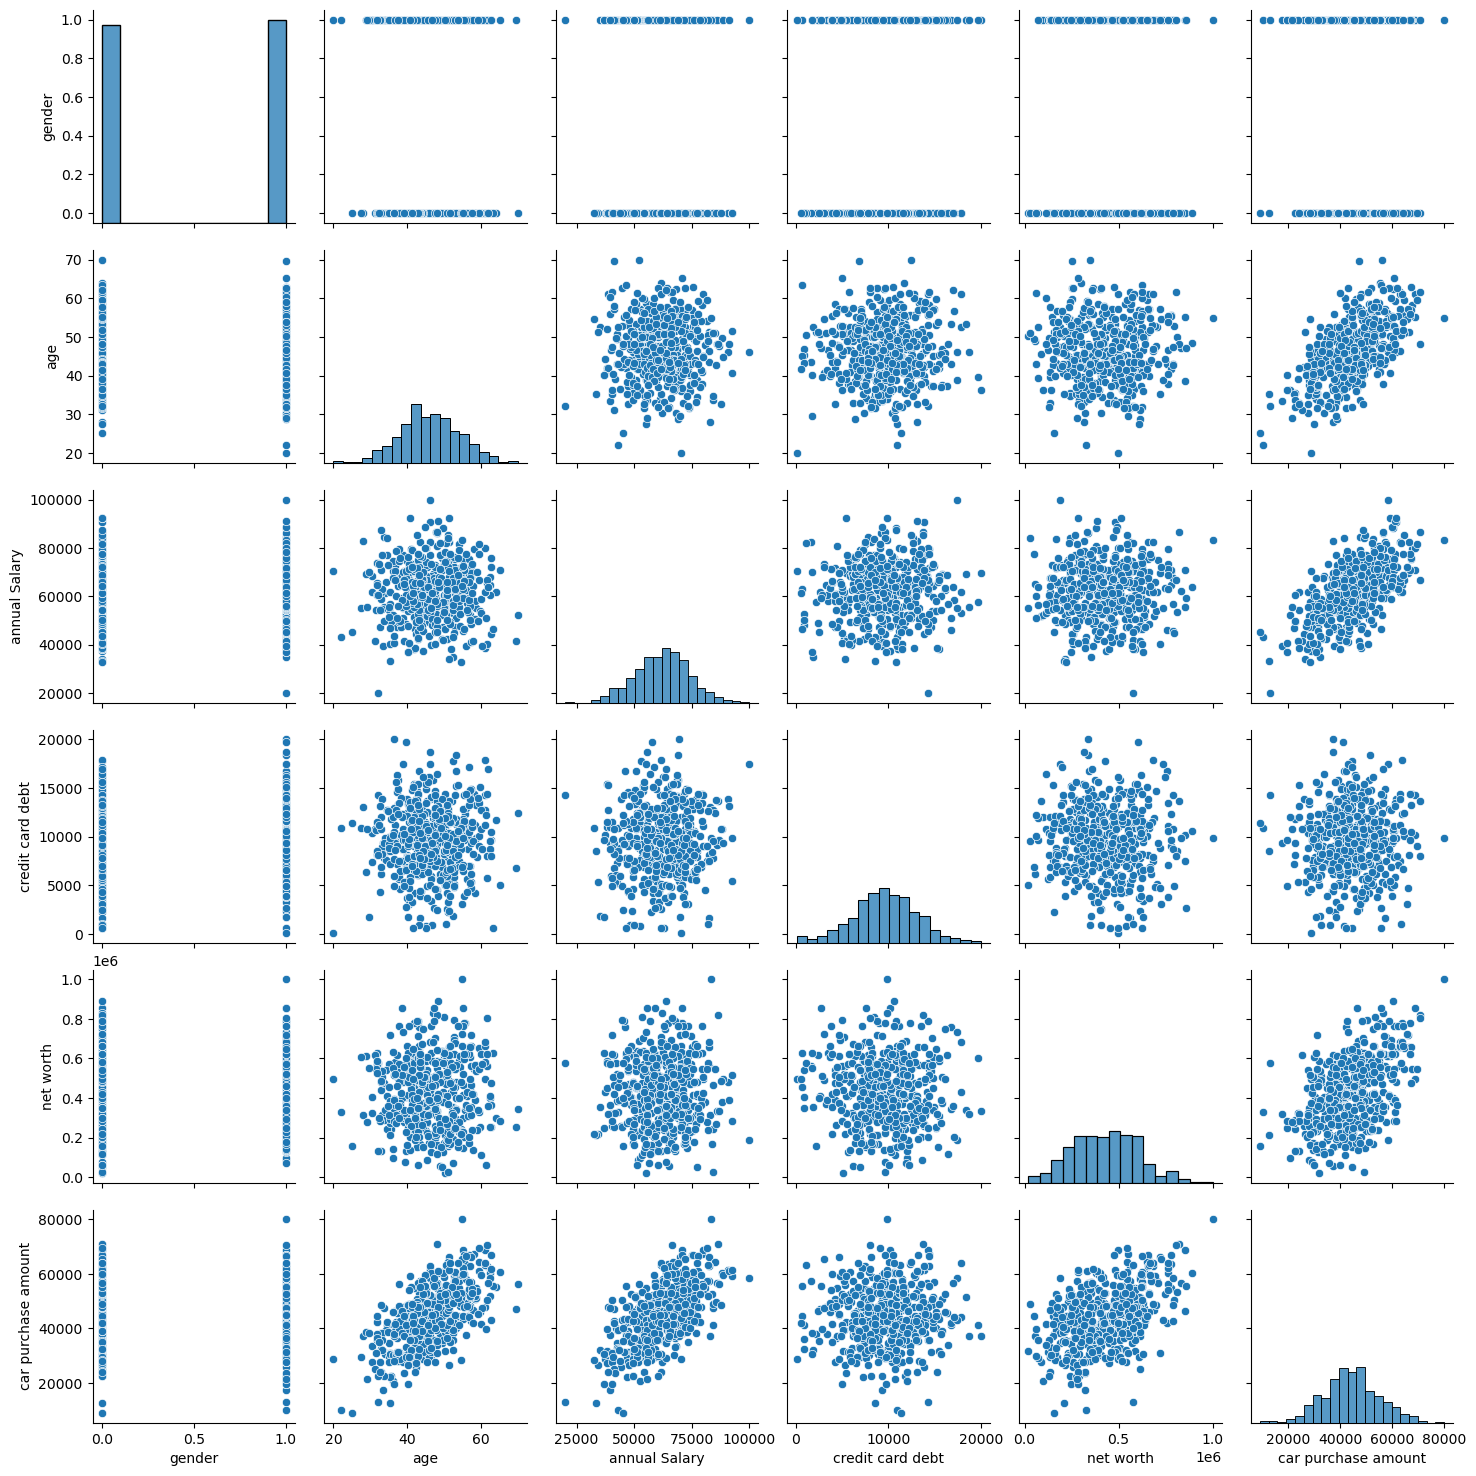

In [8]:
sns.pairplot(data=df)

<AxesSubplot:>

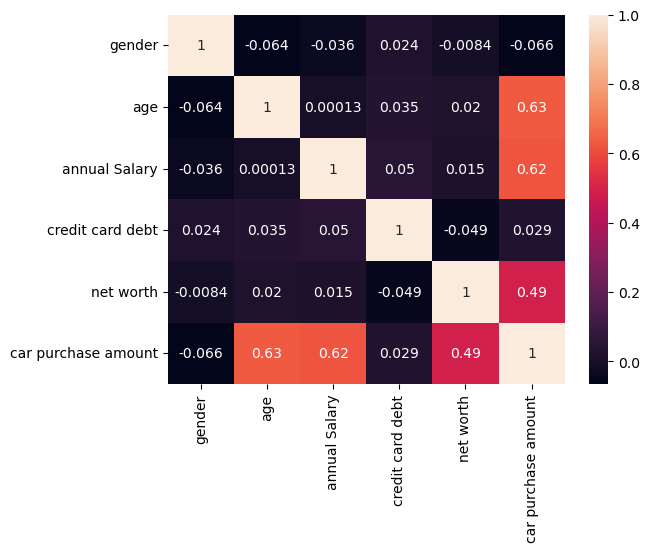

In [9]:
sns.heatmap(df.corr(), annot= True)

High Correlation between car purchase amount and Salary.
Not so High correlation between Gender ,Credit card Debt and Car Purchase Amount.

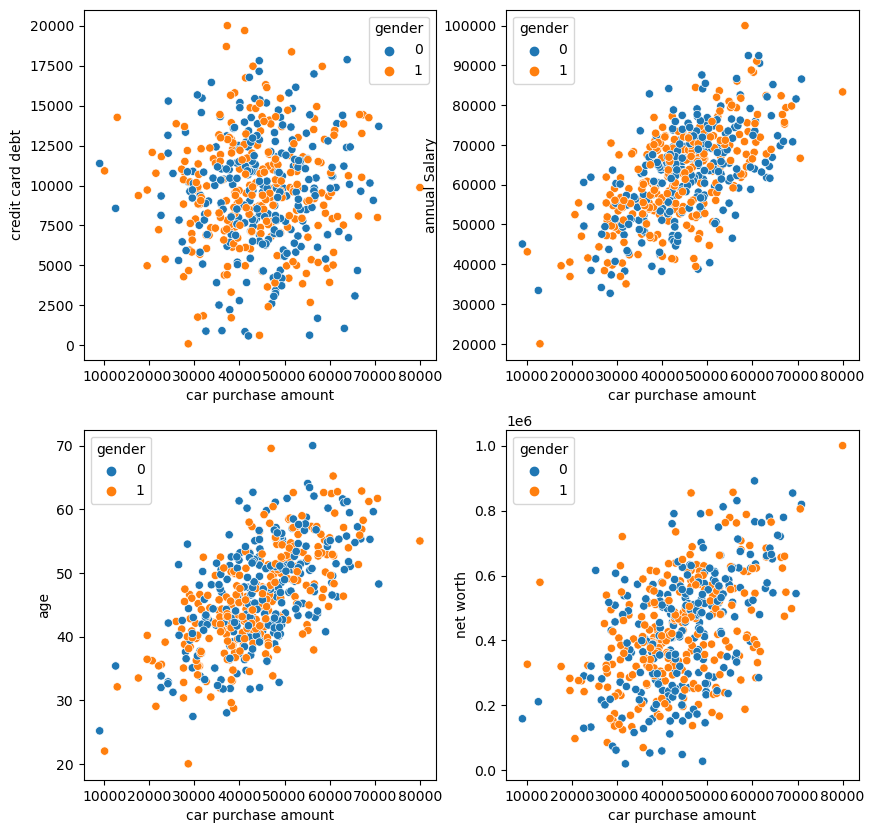

In [10]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,2,figsize=(10,10))
cols =[ 'credit card debt','age', 'annual Salary', 'net worth']
for i in range(4):
    sns.scatterplot(x='car purchase amount', y=cols[i], data=df, ax=axes[i%2,i//2], hue='gender' )
    
    

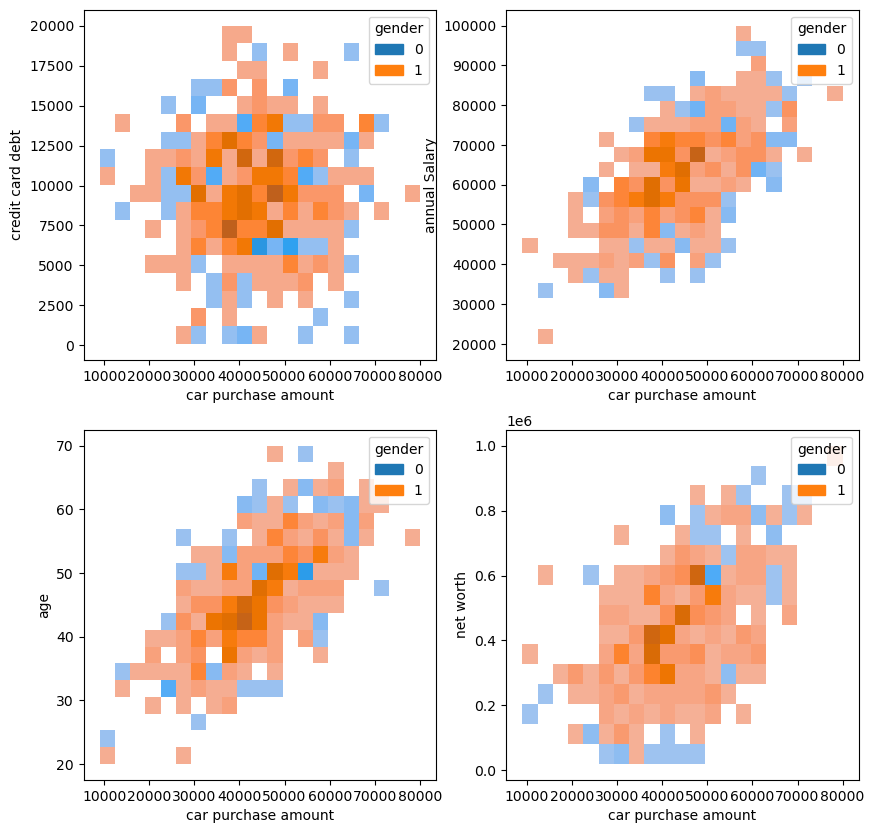

In [11]:
fig,axes = plt.subplots(2,2,figsize=(10,10))
cols =[ 'credit card debt','age', 'annual Salary', 'net worth']
for i in range(4):
    sns.histplot(kde= True, x='car purchase amount', y=cols[i], data=df, ax=axes[i%2,i//2], hue='gender' )

In [12]:
cat_cols=df.select_dtypes('object').columns
num_cols=df.select_dtypes('number').columns

# Splitting Data

In [13]:
X= df[['gender', 'age', 'annual Salary', 'credit card debt', 'net worth']]
Y= df['car purchase amount']


# Model Training

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import svm

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X , Y, test_size=0.2)


In [16]:
print(Y)


0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: car purchase amount, Length: 500, dtype: float64


In [17]:
print(y_test)

242    56499.10202
362    30964.07804
486    41489.64123
122    59416.18101
221    37303.56701
          ...     
57     41425.00116
150    27810.21814
139    32700.27871
476    48383.69071
173    57430.76903
Name: car purchase amount, Length: 100, dtype: float64


In [18]:
print('X_train shape is :', X_train.shape)
print('X_test shape is :', X_test.shape)
print('y_train shape is :', y_train.shape)
print('y_test shape is :', y_test.shape)

X_train shape is : (400, 5)
X_test shape is : (100, 5)
y_train shape is : (400,)
y_test shape is : (100,)


Model Linear Regression

In [19]:
LR= LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred_lr = LR.predict(X_test)

Model Lasso Regression

In [21]:
ls= linear_model.Lasso(alpha=0.1)
ls.fit(X_train,y_train)
y_pred_ls = ls.predict(X_test)

Model Ridge

In [22]:
ridge = linear_model.Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
y_pred_ridge = ridge.predict(X_test)

Model Support Vector Regressor

In [24]:
svr = svm.SVR()
svr.fit(X_train, y_train.values.ravel())  # Modified y_train
y_pred_svr = svr.predict(X_test)

# Calculating R2 Score for All the Methods

In [25]:
from sklearn.metrics import r2_score
R2_lr= r2_score(y_true=y_test,y_pred=y_pred_lr)
R2_ls= r2_score(y_true=y_test,y_pred=y_pred_ls)
R2_ridge= r2_score(y_true=y_test,y_pred=y_pred_ridge)
R2_svr= r2_score(y_true=y_test,y_pred=y_pred_svr)
  
print("R2 Score Linear: ",R2_lr*100)
print("R2 Score Lasso: ",R2_ls*100)
print("R2 Score Ridge: ",R2_ridge*100)
print("R2 Score Support Vector Regression: ",R2_svr*100)

R2 Score Linear:  99.99999863046152
R2 Score Lasso:  99.99999863268876
R2 Score Ridge:  99.99999863378842
R2 Score Support Vector Regression:  0.15465892114674418


Mean Absolute Error (MAE): 1.12
Mean Squared Error (MSE): 1.82


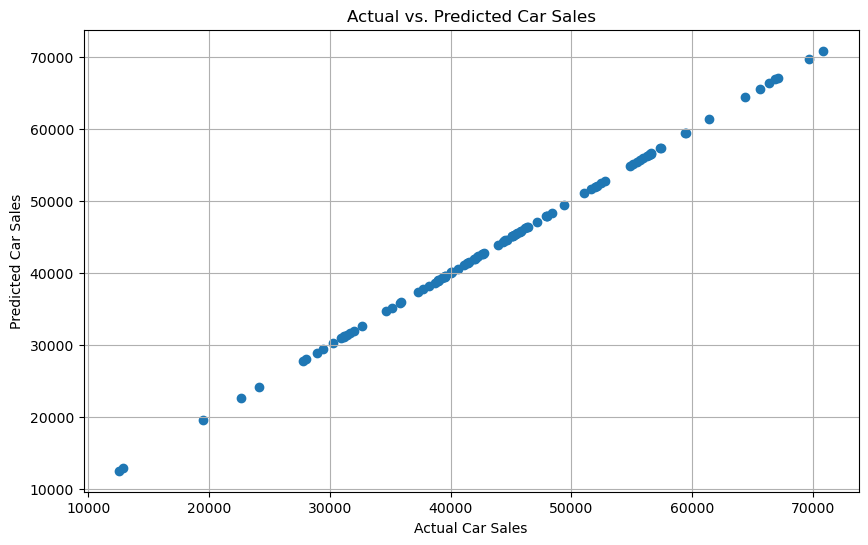

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Evaluate the model using metrics such as MAE and MSE
mae = mean_absolute_error(y_test,y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Visualize the predictions vs. actual car sales data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Car Sales")
plt.ylabel("Predicted Car Sales")
plt.title("Actual vs. Predicted Car Sales")
plt.grid(True)
plt.show()


In [27]:
# Display the predicted car purchase amounts
predicted_car_purchase = pd.DataFrame({'Predicted Car Purchase Amount': y_pred_lr.flatten()})
print(predicted_car_purchase)

    Predicted Car Purchase Amount
0                    56497.837718
1                    30963.494055
2                    41490.530970
3                    59416.246865
4                    37304.002069
..                            ...
95                   41425.940985
96                   27808.890726
97                   32701.628454
98                   48382.178298
99                   57430.557420

[100 rows x 1 columns]


In [28]:
# Display the results 
print("Machine Learning Model for Car Purchase Prediction\n")
print("Dataset Information:")
print(f"Number of Samples: {len(df)}")
print(f"Number of Features: {X.shape[1]}")
print(f"Target Variable: 'car purchase amount'\n")

print("Model Performance (R2 Score):")
print(f"Linear Regression: {R2_lr * 100:.2f}%")
print(f"Lasso Regression: {R2_ls * 100:.2f}%")
print(f"Ridge Regression: {R2_ridge * 100:.2f}%")
print(f"Support Vector Regression: {R2_svr * 100:.2f}%")

# Additional information 
print("\nThank you for using our Car Purchase Prediction Model!")


Machine Learning Model for Car Purchase Prediction

Dataset Information:
Number of Samples: 500
Number of Features: 5
Target Variable: 'car purchase amount'

Model Performance (R2 Score):
Linear Regression: 100.00%
Lasso Regression: 100.00%
Ridge Regression: 100.00%
Support Vector Regression: 0.15%

Thank you for using our Car Purchase Prediction Model!


In [90]:
new_customer = np.array([[0, 35, 75000, 3000, 70000]])
predicted_amount = ls.predict(new_customer)
print(f"Predicted Car Purchase Amount for New Customer: ${predicted_amount[0]:,.2f}")


Predicted Car Purchase Amount for New Customer: $31,511.28


C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [107]:
new_customer_data = {
    'gender': [0],
    'age': [24],
    'annual Salary' :[1200000],
    'credit card debt': [4000],
    'net worth': [50000]
}
new_customer_df = pd.DataFrame(new_customer_data)
predicted_amount = LR.predict(new_customer_df)
print(f"Predicted Car Purchase Amount for New Customer: ${predicted_amount[0][0]:,.2f}")


Predicted Car Purchase Amount for New Customer: $654,300.88


In [102]:
new_customer_data = {
    'gender': [0],
    'age': [35],
    'annual Salary' : [80000],
    'credit card debt': [5000],
    'net worth': [70000]
}
new_customer_df = pd.DataFrame(new_customer_data)
predicted_amount = LR.predict(new_customer_df)
predicted_amount_float = float(predicted_amount[0])  # Convert to float
print(f"Predicted Car Purchase Amount for New Customer: ${predicted_amount_float:,.2f}")

Predicted Car Purchase Amount for New Customer: $34,322.97


In [101]:
new_customer_data = {
    'gender': [0],               # Replace with the appropriate value (e.g., 0 or 1 for Male/Female)
    'age': [35],                # Replace with the customer's age
    'annual Salary': [75000],   # Replace with the customer's annual salary
    'credit card debt': [3000], # Replace with the customer's credit card debt
    'net worth': [70000]        # Replace with the customer's net worth
}
new_customer_df = pd.DataFrame(new_customer_data)

# Predict the car purchase amount for the new customer
predicted_amount = LR.predict(new_customer_df)
print(f"Predicted Car Purchase Amount for New Customer: ${predicted_amount[0][0]:,.2f}")

Predicted Car Purchase Amount for New Customer: $31,511.33
